## DATA EXPLORATION NOTEBOOK

This notebook is used to explore the data and to get a better understanding of the two monkeys neural recording and stimulus set.

The outline of this notebook is as follows:

1. Load Oleo and Pico data
2. Explore STIMULUS SETS

In [1]:
# import libraries

# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt


# brain-score specific
import brainscore
import brainio 
from brainscore.benchmarks._neural_common import average_repetition
from brainio.assemblies import NeuroidAssembly

from brainio.packaging import write_netcdf

/Users/ernestobocini/miniconda3/envs/brainscore/lib/python3.8/site-packages/brainscore/metrics/__init__.py:37: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


## 1. Load Oleo and Pico data

### 1.1 Load Oleo's DATA

In [2]:
# oleo is already on S3

# data assembly
assembly_oleo = brainscore.get_assembly('dicarlo.Sanghavi2021.domain_transfer')

# stimulus set
oleo_stim_set = assembly_oleo.attrs['stimulus_set']

Loading catalog from entrypoints
Loading lookup from /Users/ernestobocini/miniconda3/envs/brainscore/lib/python3.8/site-packages/brainscore/lookup.csv


### 1.2 Load Pico's DATA

In [3]:
# pico is not on S3 yet, we load it from local 

# data assembly
file_path = './dependencies/data_pico/assy_dicarlo_pico_domain_transfer.nc'
assembly_pico = brainio.assemblies.DataAssembly.from_files(file_path)

# stimulus set
csv_path = './dependencies/data_pico/stimulus_dicarlo_domain_transfer.csv'
imgs_dir_path = './images'
pico_stim_set = pd.read_csv(csv_path)


## 2. Explore STIMULUS SETS

In [4]:
oleo_stim_set.shape, pico_stim_set.shape

((3138, 8), (3138, 8))

In [5]:
print(set(oleo_stim_set.columns) - set(pico_stim_set.columns))
print(set(pico_stim_set.columns) - set(oleo_stim_set.columns))

{'stimulus_source', 'image_id'}
{'image_current_local_file_path', 'identifier'}


In [6]:
np.all(oleo_stim_set.stimulus_source == pico_stim_set.identifier)

# the goal is to have the same shared timulus set. To do so, we can rename the 
# identifier column in the pico stimulus set to stimulus_source, since it is exactly the same
# as the stimulus_source column in the oleo stimulus set:
# we can then drop the image_current_local_file_path, since it is of no use, and keep the
# image_id column from oleo

shared_stim_set = oleo_stim_set

del oleo_stim_set, pico_stim_set

In [7]:
shared_stim_set.head(3)

,filepath,object_label,image_file_name,object_style,stimulus_source,filename,image_id,stimulus_id
0,from_ko/04-art-4/im60.png,apple,im0.png,cartoon,Art,b0f59906243e042456b315475f987291aa665774.png,b0f59906243e042456b315475f987291aa665774,b0f59906243e042456b315475f987291aa665774
1,from_ko/04-art-0/im61.png,apple,im1.png,cartoon,Art,7ab65cd6d6b0b8399d070a541a0234c8836e1e8b.png,7ab65cd6d6b0b8399d070a541a0234c8836e1e8b,7ab65cd6d6b0b8399d070a541a0234c8836e1e8b
2,from_ko/04-art-3/im50.png,apple,im2.png,cartoon,Art,9ac7accbe9bdb749efd9604c16cfe52015c976d6.png,9ac7accbe9bdb749efd9604c16cfe52015c976d6,9ac7accbe9bdb749efd9604c16cfe52015c976d6


Text(0.5, 1.0, 'Number of images per object label')

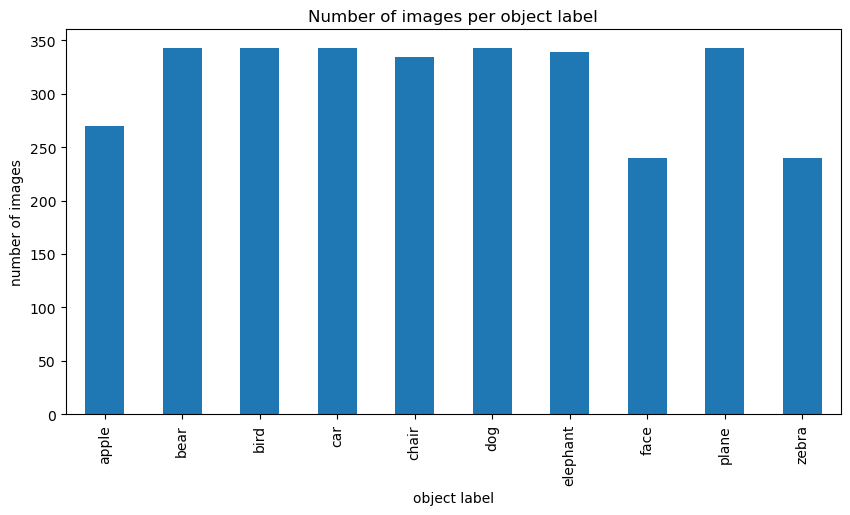

In [8]:
# plot the distribution of the number of images per object style
shared_stim_set.groupby('object_label').count().plot.bar(y='image_id', figsize=(10, 5), legend=False)
# add colors based on the stimulus_source column 
plt.ylabel('number of images')
plt.xlabel('object label')
plt.title('Number of images per object label')


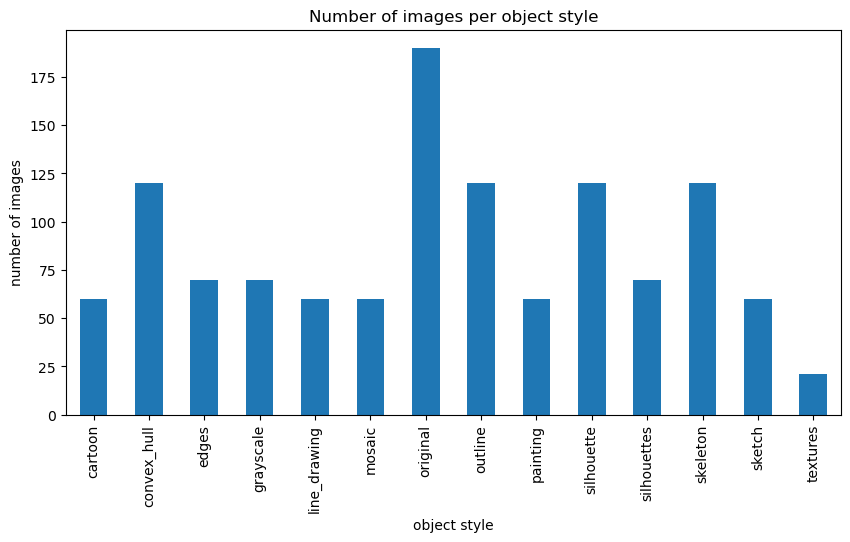

In [9]:
# plot the distribution of the number of images per category
shared_stim_set.groupby('object_style').count().plot.bar(y='image_id', figsize=(10, 5), legend=False)
plt.ylabel('number of images')
plt.xlabel('object style')
plt.title('Number of images per object style')
plt.show()

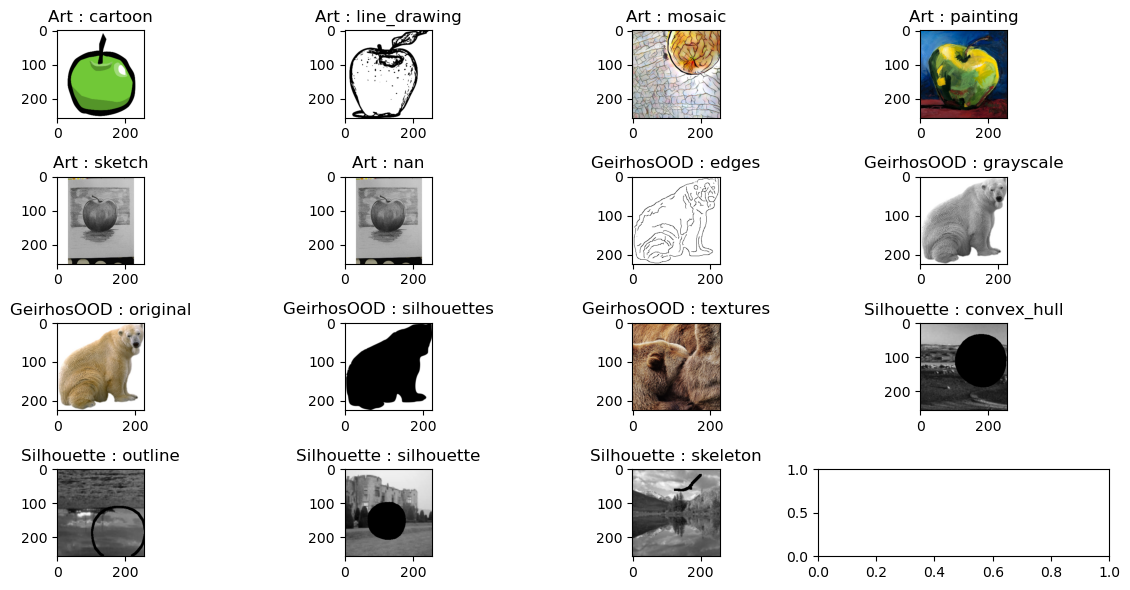

In [10]:
# Assuming you have a list of stimulus sources
object_styles = shared_stim_set.object_style.unique()

# Creating a 2x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 6))  # Adjust figsize as needed

for idx, style in enumerate(object_styles):
    try: 
        img = Image.open(os.path.join(imgs_dir_path, shared_stim_set[shared_stim_set.object_style == style].filename.values[0]))
        stim = shared_stim_set[shared_stim_set.object_style == style].stimulus_source.values[0]
    except:
        next
    
    # Determine the subplot position based on the index
    row = idx // 4  # Integer division to get the row index
    col = idx % 4    # Modulo operation to get the column index

    # Display the image on the corresponding subplot
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"{stim} : {style}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
